In [55]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
import warnings
warnings.filterwarnings('ignore')

## K means clustering:

In [56]:
from sklearn.cluster import KMeans

In [68]:
df=pd.read_csv('D:/Mall_Customers.csv')

In [69]:
df.shape

(200, 5)

In [70]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [71]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [72]:
df['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [73]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
df1=df.copy()

from sklearn.preprocessing import scale

df1=pd.DataFrame(scale(df1.iloc[:,1:]),columns=df1.columns[1:])

df1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [74]:
kmeans = KMeans(n_clusters=2)

In [75]:
kmeans.fit(df1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [76]:
pred=kmeans.predict(df1)

In [77]:
df1['cluster']=pred

In [78]:
df1['cluster'].value_counts()

0    103
1     97
Name: cluster, dtype: int64

In [79]:
kmeans.inertia_

588.8026767824936

In [80]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

In [81]:
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})

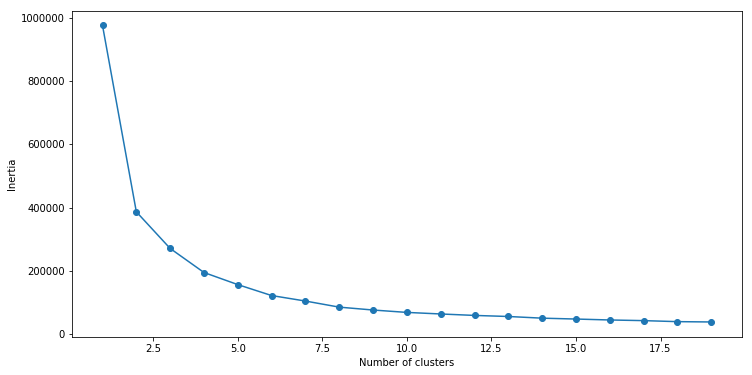

In [82]:
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

#### Trying with 4 clusters as from elbow/scree plot we can observe that above 4 cluster within cluster variance is decreasing. 

In [115]:
kmeans = KMeans(n_clusters = 6)
kmeans.fit(df1)
pred1 = kmeans.predict(df1)

In [116]:
df1['cluster1']=pred1

In [117]:
df1['cluster1'].value_counts()

2    40
0    40
4    35
1    32
5    31
3    22
Name: cluster1, dtype: int64

In [118]:
df['cluster']=df1['cluster1'].copy()

In [119]:
df['cluster'].unique()

array([3, 2, 4, 5, 0, 1])

In [120]:
df['cluster'].value_counts()

2    40
0    40
4    35
1    32
5    31
3    22
Name: cluster, dtype: int64

In [121]:
# To get the basic idea of how our clusters have been created.
# It also gives us a basic idea of how segregation of data is done when features are unlabeled.
clus_profile_df=pd.DataFrame(df.groupby('cluster').mean().sort_values('Spending Score (1-100)',ascending=False).drop(['CustomerID','Gender'],axis=1))

In [122]:
clus_profile_df

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
0,32.875000,86.100000,81.525000
3,24.136364,41.454545,62.681818
4,25.857143,43.571429,59.571429
2,49.425000,46.250000,39.725000
5,55.903226,48.774194,38.806452
1,40.906250,89.656250,16.343750


#### Inferences:
* we can observe from clus_profile_df that people with age generally around 30 are highest earning[around 80k] as compared to
  other clusters and also they are the same people who are more likely to spend money on things in mall.we can also say
  that this is our target segment
* we can also see 2nd group of customers that can be targeted by mall owners/shop owners is around age group of 24,
  their annual income is significantly lower than age group of 30 or rather we can also say that it is lowest in the
  entire age group,they prefer to spend more.In short they are low earners but high spenders.
* One other thing that we can notice is people in the age group of around 40 for some reason earn more money than any 
  other age in the clusters created by our algorithm,but they are least interested in the spending any money at mall.
* To conclude if we focus solely on basis of spending score rather than focusing how much a person earns,we can simply     say that people around age 30 are more likely to buy in malls and 2nd group is also another group which can drive mall   businesses revenue. 
* Recommendation for business owner is to target age group between 25 to 34 and age group between 35 to 55 can be safely ignored as they are least interested in buying anything from the mall.

## Hierarchial clustering:

In [131]:
from scipy.spatial.distance import pdist,squareform #pdist pairwise distance 
#between observation in n dimensional space
from scipy.cluster.hierarchy import linkage,dendrogram,cut_tree

In [125]:
df2=pd.read_csv('D:/Mall_Customers.csv')

In [126]:
df2['Gender'].replace({'Male':0,'Female':1},inplace=True)

In [135]:
# Since,customer id is not going to contribute we can safely ignore the customerid 

In [171]:
df2.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,0
1,2,0,21,15,81,1
2,3,1,20,16,6,0
3,4,1,23,16,77,1
4,5,1,31,17,40,0


In [147]:
scale_df=pd.DataFrame(scale(df2.iloc[:,1:6]),columns=df2.columns[1:6])
scale_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [153]:
d_euc=pdist(df2.iloc[:,1:6],metric='euclidean')

In [172]:
# d_euc=pdist(df1,metric='euclidean')
clus=linkage(d_euc,method='average',metric='euclidean')

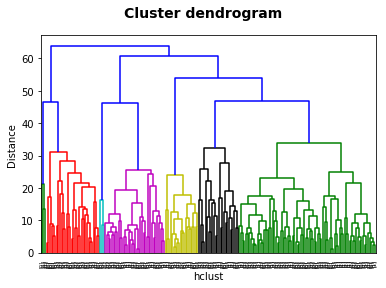

In [173]:
import matplotlib.pyplot as plt
dendrogram(clus,labels=df.iloc[:,[1]].values.tolist())
plt.xlabel('hclust')
plt.ylabel('Distance')
plt.suptitle('Cluster dendrogram',fontweight='bold',fontsize=14)
plt.show()

In [174]:
df2['Clusters']=cut_tree(clus,6) # 3 clusters are getting created and adding them into a dataframe--df2

In [175]:
df2['Clusters'].value_counts()

2    82
3    39
4    32
0    24
1    20
5     3
Name: Clusters, dtype: int64

In [176]:
df2.head(1)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,0,19,15,39,0


In [177]:
df2.groupby(['Clusters'], as_index= False).mean().sort_values('Spending Score (1-100)',ascending=False)

,Clusters,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
3,3,162.000000,0.538462,32.692308,86.538462,82.128205
1,1,21.700000,0.600000,24.850000,24.950000,81.000000
2,2,85.463415,0.609756,42.097561,54.902439,49.878049
0,0,24.375000,0.583333,45.291667,27.000000,21.750000
5,5,197.000000,0.666667,41.333333,127.666667,20.666667
4,4,161.375000,0.406250,41.718750,84.531250,16.968750
